In [199]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as pyplot

# Golden ratio constant
PHI = 1.61803

'''
This class creates an icosahedral graph (centered at the origin)
via NetworkX graph mechanisms. The user can specify the number of Sierpinski
iterations desired for the triangulation of the icosahedron faces
via the 'num_iter' parameter. The default value for 'num_iter' 
creates a standard  icosahedral graph.
'''
class icosahedron:
    def __init__(self, num_iter = 0):
        i_graph = nx.Graph()
        vertices = [(1, PHI, 0), (-1, PHI, 0), (1, -PHI, 0), (-1, -PHI, 0), (0, 1, PHI), (0, 1, -PHI), (0, -1, PHI), (0, -1, -PHI), (PHI, 0, 1), (-PHI, 0, 1), (PHI, 0, -1), (-PHI, 0, -1)]

        faces = []

        # Create triangular faces for icosahedron
        face_1 = triangle(num_iter, vertices[0], vertices[4], vertices[1])
        faces.append(face_1.graph)
        face_2 = triangle(num_iter, vertices[0], vertices[1], vertices[5])
        faces.append(face_2.graph)
        face_3 = triangle(num_iter, vertices[0], vertices[4], vertices[8])
        faces.append(face_3.graph)
        face_4 = triangle(num_iter, vertices[8], vertices[4], vertices[6])
        faces.append(face_4.graph)
        face_5 = triangle(num_iter, vertices[0], vertices[10], vertices[8])
        faces.append(face_5.graph)
        face_6 = triangle(num_iter, vertices[0], vertices[10], vertices[5])
        faces.append(face_6.graph)
        face_7 = triangle(num_iter, vertices[10], vertices[7], vertices[5])
        faces.append(face_7.graph)
        face_8 = triangle(num_iter, vertices[2], vertices[10], vertices[8])
        faces.append(face_8.graph)
        face_9 = triangle(num_iter, vertices[8], vertices[2], vertices[6])
        faces.append(face_9.graph)
        face_10 = triangle(num_iter, vertices[2], vertices[10], vertices[7])
        faces.append(face_10.graph)
        face_11 = triangle(num_iter, vertices[2], vertices[3], vertices[7])
        faces.append(face_11.graph)
        face_12 = triangle(num_iter, vertices[2], vertices[3], vertices[6])
        faces.append(face_12.graph)
        face_13 = triangle(num_iter, vertices[3], vertices[7], vertices[11])
        faces.append(face_13.graph)
        face_14 = triangle(num_iter, vertices[3], vertices[9], vertices[11])
        faces.append(face_14.graph)
        face_15 = triangle(num_iter, vertices[3], vertices[9], vertices[6])
        faces.append(face_15.graph)
        face_16 = triangle(num_iter, vertices[9], vertices[4], vertices[6])
        faces.append(face_16.graph)
        face_17 = triangle(num_iter, vertices[9], vertices[11], vertices[1])
        faces.append(face_17.graph)
        face_18 = triangle(num_iter, vertices[1], vertices[11], vertices[5])
        faces.append(face_18.graph)
        face_19 = triangle(num_iter, vertices[9], vertices[4], vertices[1])
        faces.append(face_19.graph)
        face_20 = triangle(num_iter, vertices[5], vertices[7], vertices[11])
        faces.append(face_20.graph)

        # Combine faces via disjoint union
        i_graph = faces[0]
        for face in faces:
            for node in face.nodes:
                i_graph = nx.disjoint_union(i_graph, face)
        
        # Mechanism for eliminating repeated nodes
        seen_pos = []
        merged_nodes = {}
        count = 0
        positions = nx.get_node_attributes(i_graph, 'pos')
        node_list = list(i_graph.nodes).copy()

        for node in node_list:
            position = positions[count]
            if position in seen_pos:
                merged_nodes[position] = merge(i_graph, merged_nodes[position], node)
            else:
                seen_pos.append(position)
                merged_nodes[position] = node
            count += 1
        
        # Readding position attribute
        inv_positions = {v: k for k, v in merged_nodes.items()}
        nx.set_node_attributes(i_graph, inv_positions, 'pos')
        positions2 = nx.get_node_attributes(i_graph, 'pos')
        self.graph = i_graph
        
# Function for merging repeated graph nodes
def merge(G, n1, n2):
    first_neighbors = G.neighbors(n1)
    second_neighbors = G.neighbors(n2)
    name = str(n1) + str(n2)
    G.add_edges_from([(p, name) for p in first_neighbors])
    G.add_edges_from([(name, s) for s in second_neighbors])

    # Remove old nodes
    G.remove_nodes_from([n1, n2])
    return name


# Helper functions for triangle class
def triangulate(num_iterations, points):
        if num_iterations > 0:
            points.extend(triangulate(num_iterations - 1, [points[0], midpoint(points[0], points[1]), midpoint(points[0], points[2])]))
            points.extend(triangulate(num_iterations - 1, [midpoint(points[0], points[2]), midpoint(points[2], points[1]), points[2]]))
            points.extend(triangulate(num_iterations - 1, [midpoint(points[0], points[1]), points[1], midpoint(points[2], points[1])]))
            points.extend(triangulate(num_iterations - 1, [midpoint(points[0], points[2]), midpoint(points[2], points[1]), midpoint(points[1], points[0])]))
        return points

def midpoint(point1, point2):
    return ((point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2, (point1[2] + point2[2]) / 2)


'''
This class creates a triangular graph with three initial vertices 
defined by user-specified parameters. The number of Sierpinski iterations 
desired for this triangular graph can also be specified via the 'num_iterations'
parameter. Mechanisms are provided for drawing the resulting graph.
'''
class triangle:
    def __init__(self, num_iterations, node1 = (0.0, 0.0, 0.0), node2 = (2.0, 0.0, 0.0), node3 = (1.0, 1.0, 0.0)):
        output_points = triangulate(num_iterations, [node1, node2, node3])
        final_points = []

        for count, point in enumerate(output_points):
            if count % 3 == 0:
                final_points.append(output_points[count:count + 3])

        self.points = final_points
        self.graph = self.create_graph()

    def create_graph(self):
        points = self.points
        my_graph = nx.Graph()
        seen = {}
        connections = []
        count = 0
        for point_set in points:
            curr_nodes = []
            for point in point_set:
                if point not in seen.keys():
                    my_graph.add_node(count, pos = point)
                    seen[point] = count
                    curr_nodes.append(count)
                    count += 1
                else:
                    curr_nodes.append(seen[point])
            my_graph.add_edges_from([(curr_nodes[0], curr_nodes[1]),(curr_nodes[1], curr_nodes[2]),(curr_nodes[2], curr_nodes[0])])
            connections.append((curr_nodes[0], curr_nodes[1]))
            connections.append((curr_nodes[1], curr_nodes[2]))
            connections.append((curr_nodes[2], curr_nodes[0]))

        return my_graph

    # Note: nx.draw does not work in 3-dimensions, projection to 2-dimensions required
    def draw_triangle(self):
        graph = self.graph
        positions = nx.get_node_attributes(graph, 'pos')
        nodes = graph.nodes()
        to_remove = []
        nx.draw(graph, positions)
        pass


In [200]:
x = icosahedron(0)

In [213]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def network_plot_3D(G, angle, save=False):
    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')
    
    # Get number of nodes
    n = G.number_of_nodes()
    # Get the maximum number of edges adjacent to a single node
    edge_max = 3
    # Define color range proportional to number of edges adjacent to a single node
   #colors = [plt.cm.plasma(G.degree(i)/edge_max) for i in range(n)] 
    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            
            # Scatter plot
            ax.scatter(xi, yi, zi, s=20+20*G.degree(key), edgecolors='k', alpha=0.7)
        
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for i,j in enumerate(G.edges()):
            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
        # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)
    
    # Set the initial view
    ax.view_init(30, angle)

    plt.show()
    
    return

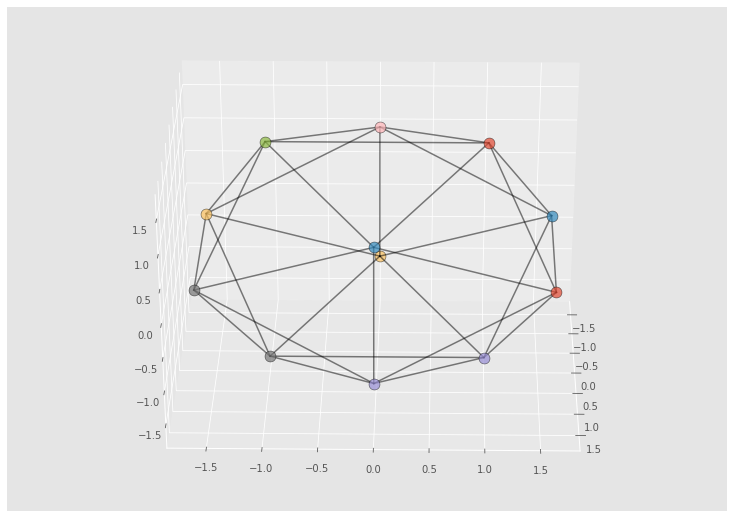

In [214]:
network_plot_3D(x.graph, 1)